#### Import modules

In [5]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

#### Making a list to include dicts and using 'with open'

In [6]:
new_list = []
with open('insurance.csv', newline='') as file:
    dicts = csv.DictReader(file)
    new_list = [dict for dict in dicts]

In [46]:
#print(new_list)

#### Making a dict to include dicts

In [8]:
def new_dict():
    new_dict = {i+1:new_list[i] for i in range(len(new_list))}
    return new_dict
new_dict = new_dict()

In [9]:
#print(new_dict)

#### Smokers and non smokers separator functions

In [10]:
def num_smokers():
    smokers = {i+1:new_list[i] for i in range(len(new_list)) if new_list[i]['smoker'] == 'yes'}
    return smokers
def num_non_smokers():
    non_smokers = {i+1:new_list[i] for i in range(len(new_list)) if new_list[i]['smoker'] == 'no'}
    return non_smokers
smokers = num_smokers()
non_smokers = num_non_smokers()

#### Tests

In [11]:
print(f'The number of the persons participating in this test is {len(new_dict)}.')

The number of the persons participating in this test is 1338.


In [12]:
print(f'From the {len(new_dict)} persons there are {len(smokers)} smokers in the sample.')
#print(non_smokers)

From the 1338 persons there are 274 smokers in the sample.


#### Sex numbers and ages function

In [13]:
def numbers_and_ages(sex=None):
    ages_fm = 0
    ages_m = 0
    counter_fm = 0
    for value in new_dict.values():
        if value['sex'] == 'female':
            ages_fm += int(value['age'])
            counter_fm += 1
        elif value['sex'] == 'male':
            ages_m += int(value['age'])
    mean_fm = round(ages_fm / counter_fm, 3)
    counter_m = len(new_dict) - counter_fm
    mean_m = round( ages_m / counter_m, 3)
    s1 = 'In the dataset there are'
    s2 = 'their mean age is'
    if sex == 'female':
        print(s1, counter_fm, sex, 'persons,', s2, mean_fm, 'years.')
    elif sex == 'male':
        print(s1, counter_m,sex, 'persons,', s2, mean_m, 'years.')
    else:
        print('Invalid data.')

#### Tests

In [14]:
female_nums_ages = numbers_and_ages('female')
#male_nums_ages = numbers_and_ages('male')
#children_nums_ages = numbers_and_ages('children')
#noones_nums_ages = numbers_and_ages()

In the dataset there are 662 female persons, their mean age is 39.503 years.


#### Function for determining unique places and counting the persons living there

In [15]:
#living_place = {i+1:new_list[i]['region'] for i in range(len(new_list))}
#living_place_list = [living_place[i] for i in range(1, len(living_place)+1)]
living_place_list = [new_list[i]['region'] for i in range(len(new_list))]
unique = []
def unique_places():
    for place in living_place_list:
        if place not in unique:
            unique.append(place)
    return unique
def persons_in_places(location):
    string = 'The number of persons living in ' + location + ' is'
    if location in unique:
        print(string, str(living_place_list.count(location))+'.')
    else:
        print('Invalid value')

In [16]:
unique_places = unique_places()

In [17]:
print(f'There are {len(unique_places)} different living places which are as follows: {unique}')

There are 4 different living places which are as follows: ['southwest', 'southeast', 'northwest', 'northeast']


In [18]:
persons_in_places('southwest')
#persons_in_places('southeast')
#persons_in_places('northwest')
#persons_in_places('northeast')

The number of persons living in southwest is 325.


#### Mean insurance and smoker-non smoker insurance cost methods

In [19]:
def mean_insurance_cost():
    avg = 0
    total_cost = 0
    for value in new_dict.values():
        total_cost += int(float(value['charges']))
        mean = total_cost / len(new_dict)
        avg = round(mean)
    return f'The average insurance cost is ${avg:,} regarding the sample.'

In [20]:
def insurance_cost(smoker_status='non smoker'):
    str1 = 'The total insurance cost for ' + smoker_status + 's'
    str2 = 'The average insurance cost for ' + smoker_status + 's'
    str3 = 'The average difference between smokers and non smokers is'
    cost_smokers = 0
    cost_non_smokers = 0
    for value in new_dict.values():
        if value['smoker'] == 'yes':
            cost_smokers += int(float(value['charges']))
        elif value['smoker'] == 'no':
            cost_non_smokers += int(float(value['charges']))
    diff = round(cost_smokers/len(smokers) - cost_non_smokers/len(non_smokers))
    if smoker_status == 'smoker':
        return f'''{str1} is ${cost_smokers:,}
{str2} is ${round(cost_smokers/len(smokers)):,}
{str3} ${diff:,}.'''
    else:
        return f'''{str1} is ${cost_non_smokers:,}.
{str2} is ${round(cost_smokers/len(non_smokers)):,}.
{str3} ${diff:,}.'''

#### Tests

In [21]:
print(mean_insurance_cost())
#print(insurance_cost('smoker'))
print(insurance_cost('non smoker'))
#print(insurance_cost())

The average insurance cost is $13,270 regarding the sample.
The total insurance cost for non smokers is $8,973,540.
The average insurance cost for non smokers is $8,253.
The average difference between smokers and non smokers is $23,616.


In [22]:
#print(new_dict)

#### Children and BMI list making

In [23]:
children = []
for value in new_dict.values():
    children.append(int(value['children']))

In [24]:
bmi = []
for value in new_dict.values():
    bmi.append(int(float(value['bmi'])))

#### Number of children distribution

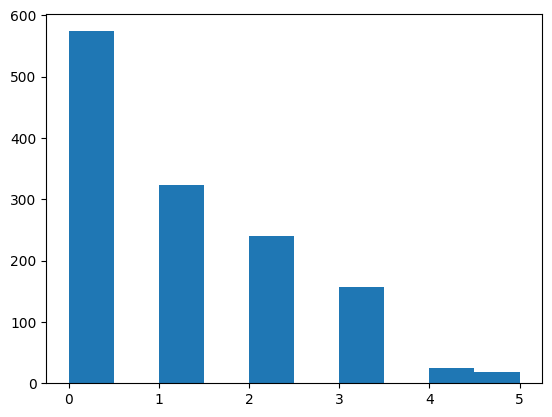

In [25]:
plt.hist(children)
plt.show()

#### BMI distribution

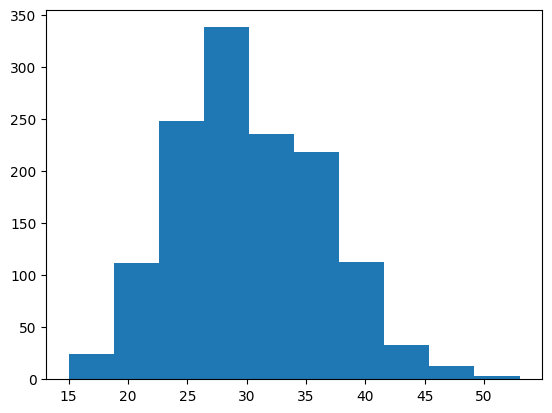

In [26]:
plt.hist(bmi)
plt.show()

#### Calculating the insurance cost who has at least one child and showing the number of those persons. 

In [27]:
parents = []
def ins_cost_parents(status=None):
    total = 0
    if status == 'yes':
        for value in new_dict.values():
            if int(value['children']) > 0:
                a = int(float(value['charges']))
                parents.append(a)
                total += a
                mean = total / len(parents)
                rounded = round(mean)
    return f'The average insurance cost for being a parent is ${rounded:,}. In this sample there are {len(parents)} parents.'

In [28]:
print(ins_cost_parents('yes'))

The average insurance cost for being a parent is $13,949. In this sample there are 764 parents.


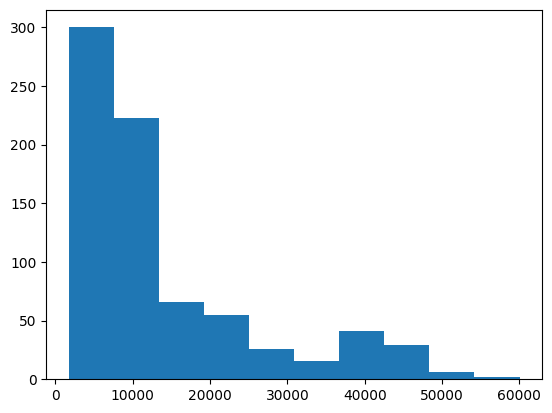

In [29]:
plt.hist(parents)
plt.show()

#### Using pandas

In [30]:
df = pd.DataFrame(new_list)

In [31]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33,3,no,southeast,4449.462


In [32]:
df.tail(3)

,age,sex,bmi,children,smoker,region,charges
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.8,0,no,southwest,2007.945
1337,61,female,29.07,0,yes,northwest,29141.3603


In [33]:
df.shape

(1338, 7)

In [34]:
df['sex'].value_counts()


sex
male      676
female    662
Name: count, dtype: int64

In [35]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [36]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [37]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [38]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.88,0,no,northwest,3866.8552


In [39]:
def mean_insurance():
    total = 0
    for num in df['charges']:
        total += int(float(num))
        mean = round(total / len(df))
    return mean

In [40]:
mean_insurance = mean_insurance()

In [41]:
print(f'The average insurance cost is ${mean_insurance:,}')

The average insurance cost is $13,270


In [42]:
filt = (df['smoker'] == 'yes')

In [43]:
df[filt]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.3,0,yes,southwest,36837.467
23,34,female,31.92,1,yes,northeast,37701.8768
...,...,...,...,...,...,...,...
1313,19,female,34.7,2,yes,southwest,36397.576
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.37,2,yes,southeast,43896.3763


In [44]:
smokers_list = []
def smoker_vs_nonsmokers(smoker_status):
    total_cost1 = 0
    total_cost2 = 0
    str1 = 'The number of '
    str2 = 'The average insurance cost for smokers is'
    str3 = 'The difference between the average insurance cost and the '
    for num in df[filt]['charges']:
            smokers_list.append(num)
            total_cost1 += int(float(num))
            mean1 = round(total_cost1 / len(smokers_list))
    print(f'{str1}smokers is {len(smokers_list)}. {str2} ${mean1:,}. This is ${(mean1 - mean_insurance):,} more than the ${mean_insurance:,} average insurance.')

In [45]:
smoker_vs_nonsmokers('smoker')

The number of smokers is 274. The average insurance cost for smokers is $32,050. This is $18,780 more than the $13,270 average insurance.
